<a href="https://colab.research.google.com/github/Yash-coder-alt/Level_3_Task_/blob/main/Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Dataset .csv")

In [3]:
# Step 3: Basic Inspection
print(df.columns)
print(df.head())

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chin

In [6]:
# Step 4: Preprocess Text Data
# Assuming 'Review Text' and 'Aggregate rating' are the correct columns

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Clean reviews
df['Cleaned_Review'] = df['Rating text'].apply(clean_text)

# Calculate review length
df['Review_Length'] = df['Cleaned_Review'].apply(lambda x: len(x.split()))

In [7]:
# Step 5: Positive and Negative Keywords Analysis
# Define some basic positive and negative words
positive_words = ['good', 'great', 'amazing', 'delicious', 'friendly', 'awesome', 'tasty', 'perfect', 'excellent']
negative_words = ['bad', 'worst', 'terrible', 'disappointing', 'rude', 'slow', 'cold', 'bland', 'awful']

# Count words across all reviews
all_words = ' '.join(df['Cleaned_Review']).split()
word_freq = Counter(all_words)

# Positive and negative counts
positive_freq = {word: freq for word, freq in word_freq.items() if word in positive_words}
negative_freq = {word: freq for word, freq in word_freq.items() if word in negative_words}

print("\nMost Common Positive Words:")
print(positive_freq)

print("\nMost Common Negative Words:")
print(negative_freq)


Most Common Positive Words:
{'excellent': 301, 'good': 3179}

Most Common Negative Words:
{}


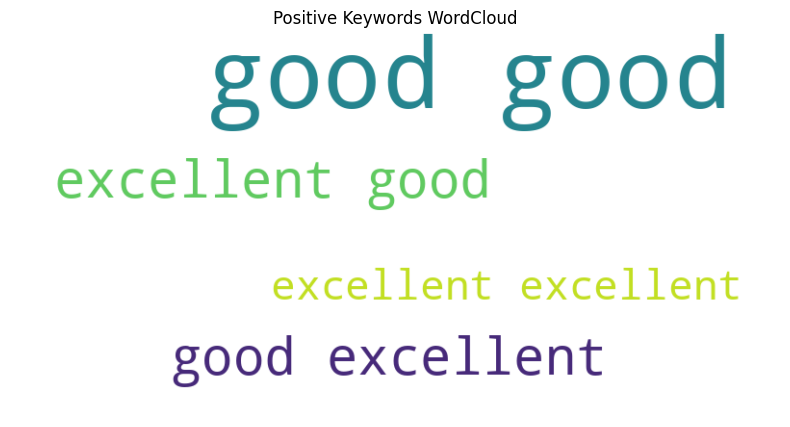

No negative words found in the reviews to generate a WordCloud.


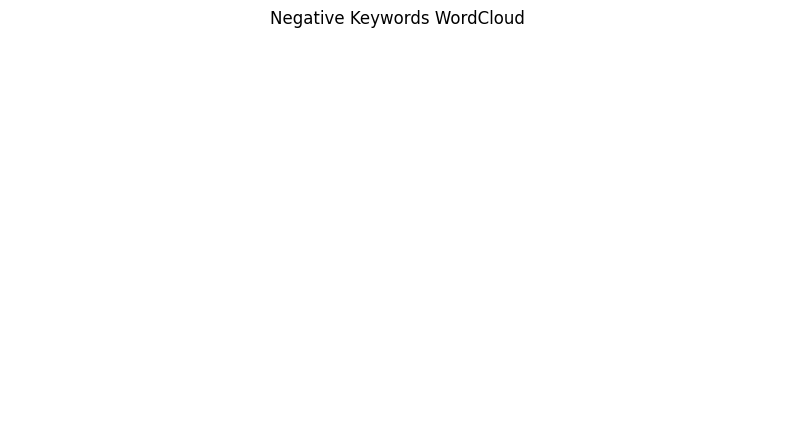

In [15]:
# Step 6: Plot Word Clouds
# Positive WordCloud
positive_text = ' '.join([word for word in all_words if word in positive_words])
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Keywords WordCloud')
plt.show()

# Negative WordCloud
# Create negative text
negative_text = ' '.join([word for word in all_words if word in negative_words])

# Only generate and plot if there are words
if negative_text.strip():
    negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

    plt.figure(figsize=(10,5))
    plt.imshow(negative_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Keywords WordCloud')
    plt.show()
else:
    print("No negative words found in the reviews to generate a WordCloud.")


plt.figure(figsize=(10,5))
plt.axis('off')
plt.title('Negative Keywords WordCloud')
plt.show()


Average Review Length: 1.34 words


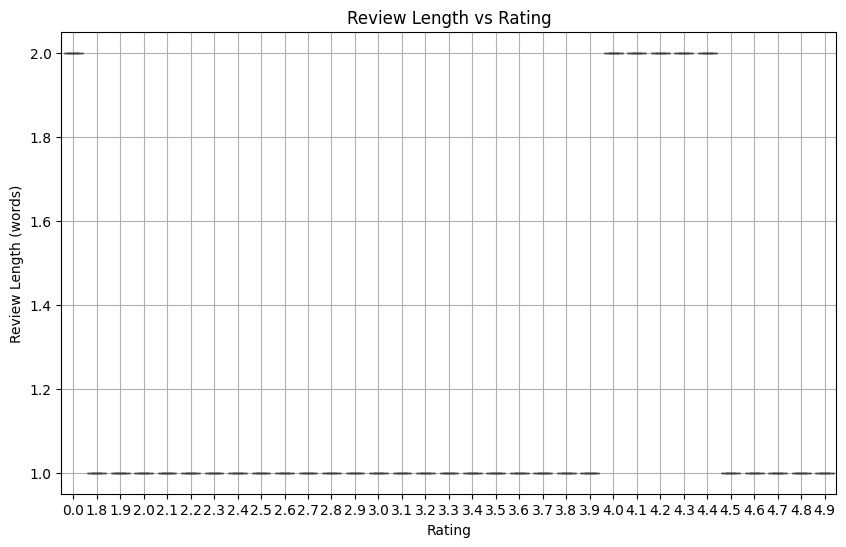

In [16]:
# Step 7: Review Length Analysis
# Average review length
avg_length = df['Review_Length'].mean()
print(f"\nAverage Review Length: {avg_length:.2f} words")

# Review Length vs Rating
plt.figure(figsize=(10,6))
sns.boxplot(x='Aggregate rating', y='Review_Length', data=df)
plt.title('Review Length vs Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (words)')
plt.grid(True)
plt.show()

In [17]:
# Step 8: Correlation between Review Length and Rating
correlation = df['Aggregate rating'].corr(df['Review_Length'])
print(f"\nCorrelation between review length and rating: {correlation:.2f}")


Correlation between review length and rating: -0.60
